In [1]:
cd ../

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob

In [3]:
# specify path to the lightcurve
lc_path = "microlensing/ogle-2011-blg-0265-planet/phot.dat"

# object name (or abbreviation)
n = "microlensing_planet"

# resample length for time-sorted LC purposes
resample_len = '16h'

# LC Data Munging

In [4]:
lc = pd.read_csv(lc_path, 
                 sep="\s+",  
                 usecols=[0,1], 
                 names=['hjd', 'mag', 'magerr', '1', '2'])

In [5]:
lc.head()

,hjd,mag
0,2.455261e+06,17.291
1,2.455261e+06,17.255
2,2.455262e+06,17.251
3,2.455265e+06,17.281
4,2.455266e+06,17.270


In [6]:
lc['mjd'] = jd.jd_to_mjd(lc['hjd'])

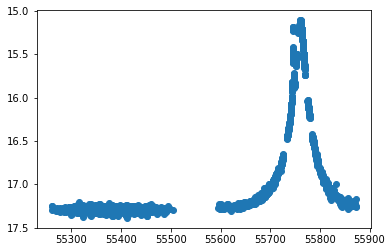

In [7]:
#raw data
plt.scatter(lc['mjd'], lc['mag'])
plt.gca().invert_yaxis()

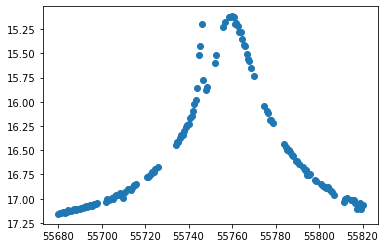

In [9]:
# #resampled data
# lc.rename(columns={'hjd':'mjd'}, inplace=True)
time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
time_preproc_lc_final = time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(55680, 55820)]
plt.scatter(time_preproc_lc_final['Modified Julian Day'], time_preproc_lc_final['Magnitude'])
plt.gca().invert_yaxis()

In [10]:
#number of days video covers
len(time_preproc_lc_final)

211

In [11]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc_final) / 8.5), "s")

Estimated video time of 24.823529411764707 s


# Export Preprocessed Files

In [12]:
#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [13]:
#save preprocessed files
time_preproc_lc_final.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)